In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
(train_ds,val_ds,test_ds),info=tfds.load(
    'tf_flowers',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    as_supervised=True,
    with_info=True
)

#resize the image and noralize
def preprocess(image,label):
    image=tf.image.resize(image,(227,227))
    image=image/255.0
    return image,label

train_ds=train_ds.map(preprocess).batch(16)
val_ds = val_ds.map(preprocess).batch(16)
test_ds  = test_ds.map(preprocess).batch(16)

In [ ]:
model =Sequential()

model.add(Conv2D(filters=96,kernel_size=(11,11),strides=4,activation='relu',input_shape=(227,227,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))

model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))


model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,activation='relu',padding='same'))

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,activation='relu',padding='same'))

model.add(Conv2D(filters=256,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096,activation='relu'))
# The number of output neurons should match the number of classes in the dataset.
# The tf_flowers dataset has 5 classes.
model.add(Dense(5,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,301,829 (222.40 MB)

 Trainable params: 58,301,829 (222.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 584s 3s/step - accuracy: 0.2236 - loss: 1.6060 - val_accuracy: 0.2589 - val_loss: 1.5870
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - accuracy: 0.2732 - loss: 1.5748 - val_accuracy: 0.3924 - val_loss: 1.4825
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.4015 - loss: 1.3994 - val_accuracy: 0.5068 - val_loss: 1.2429
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.4578 - loss: 1.2553 - val_accuracy: 0.5041 - val_loss: 1.2426
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.5234 - loss: 1.1741 - val_accuracy: 0.5286 - val_loss: 1.1354


In [ ]:
result=[]
result=model.evaluate(test_ds)
print(result) #loss,accuracy

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 895ms/step - accuracy: 0.5434 - loss: 1.0771
[1.0807173252105713, 0.531335175037384]


In [ ]:
y_pred=model.predict(test_ds)

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 897ms/step


In [ ]:
y_pred

array([[0.00535379, 0.02644512, 0.32647222, 0.02039857, 0.62133014],
       [0.64992404, 0.24186079, 0.03624165, 0.01455108, 0.05742249],
       [0.3177524 , 0.07507204, 0.10179956, 0.45629317, 0.04908283],
       ...,
       [0.00506424, 0.01765123, 0.2819979 , 0.00966992, 0.6856167 ],
       [0.5550982 , 0.24677178, 0.05988359, 0.03401507, 0.10423137],
       [0.18415444, 0.08495902, 0.06711258, 0.6407212 , 0.02305278]],
      dtype=float32)

In [ ]:
predicted_labels = tf.argmax(y_pred, axis=1).numpy()

In [ ]:
# Get true labels from test_ds
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)


In [ ]:
print("First 10 Predicted Labels:", predicted_labels[:10])
print("First 10 True Labels     :", true_labels[:10])


First 10 Predicted Labels: [4 0 3 4 0 0 4 0 3 0]
First 10 True Labels     : [4 0 0 2 0 0 2 1 3 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


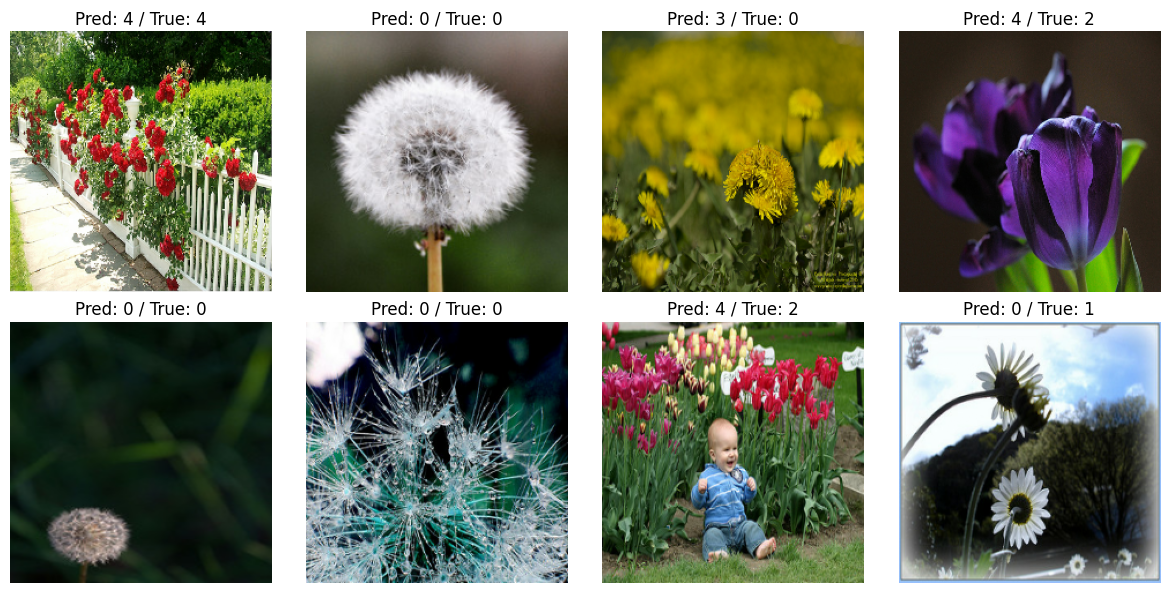

In [ ]:
import matplotlib.pyplot as plt

# Show a batch of images with predicted and true labels
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)

    plt.figure(figsize=(12,6))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"Pred: {pred_labels[i].numpy()} / True: {labels[i].numpy()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()